# AX-12A Hexapod Kinematics

Kevin Walchko, Phd

25 Feb 2020

-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

---

**Still in development**

- **Coxa:** hip segment which moves left/right in red
- **Femur:** blue segment
- **Tibia:** yellow segment

In [183]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
# from sympy import symbols, sin, cos, pi, simplify
# from math import cos, sin, pi, atan2, sqrt, acos
import math

## Forward Kinematics

The [modified DH parameters](https://en.wikipedia.org/wiki/Denavit%E2%80%93Hartenberg_parameters#Modified_DH_parameters) are:


| i |$a_i$  | $\alpha_i$ | $d_i$ | $\theta_i$ |
|---|:------|:-----------|:------|:-----------|
| 1 | body  | 0          | 0     | $\theta_1$ |
| 2 | coxa  | 90         | 0     | $\theta_2$ |
| 3 | femur | 0          | 0     | $\theta_3$ |
| 4 | tibia | 90         | 0     | 0          |

- $a_i$: **link length** in mm from $Z_{i-1}$ to $Z_i$ along $X_i$
- $\alpha_i$: **twist angle** between $Z_{i-1}$ and $Z_i$ measured about $X_i$
- $d_i$: **offset distance** between $X_{i-1}$ and $X_i$ along $Z_i$
- $\theta_i$: **rotation angle** between $X_{i-1}$ and $X_i$ measured about $Z_i$

| Link  | Name   | mm |
|-------|--------|----|
| $L_1$ | coxa   | 50 |
| $L_2$ | femur  | 65 |
| $L_3$ | tibia  | 68 |

In [169]:
from sympy import symbols, sin, cos, pi, simplify
def makeT(a, alpha, d, theta):
    # create a modified DH homogenious matrix
    return np.array([
        [           cos(theta),           -sin(theta),           0,             a],
        [sin(theta)*cos(alpha), cos(theta)*cos(alpha), -sin(alpha), -d*sin(alpha)],
        [sin(theta)*sin(alpha), cos(theta)*sin(alpha),  cos(alpha),  d*cos(alpha)],
        [                    0,                     0,           0,             1]
    ])

def simplifyT(tt):
    """
    This goes through each element of a matrix and tries to simplify it.
    """
    ret = []
    for row in tt:
        m = []
        for col in row:
            m.append(simplify(col))
        ret.append(m[:])
    return np.array(ret)

def subs(tt, m):
    """
    This allows you to simplify the trigonomic mess that kinematics can
    create and also substitute in some inputs in the process
    
    Yes, this is basically the same as above. I could combine these into 1
    function, but I wanted to beclearer on what I am doing.
    """
    ret = tt.copy()
    for i, row in enumerate(tt):
        for j, col in enumerate(row):
            try:
                ret[i,j] = col.subs(m)
            except:
                ret[i,j] = simplify(col)
    return ret

In [170]:
t1, t2, t3 = symbols('t1 t2 t3')
l1, l2, l3 = symbols('l1 l2 l3')

In [171]:
# a, alpha, d, theta
T1 = makeT(0,     0, 0, t1)
T2 = makeT(l1, pi/2, 0, t2)
T3 = makeT(l2,    0, 0, t3)
T4 = makeT(l3, pi/2, 0, 0)

In [172]:
print('T1 = ', T1)
print('T2 = ', T2)
print('T3 = ', T3)
print('T4 = ', T4)

T1 =  [[cos(t1) -sin(t1) 0 0]
 [sin(t1) cos(t1) 0 0]
 [0 0 1 0]
 [0 0 0 1]]
T2 =  [[cos(t2) -sin(t2) 0 l1]
 [0 0 -1 0]
 [sin(t2) cos(t2) 0 0]
 [0 0 0 1]]
T3 =  [[cos(t3) -sin(t3) 0 l2]
 [sin(t3) cos(t3) 0 0]
 [0 0 1 0]
 [0 0 0 1]]
T4 =  [[1 0 0 l3]
 [0 0 -1 0]
 [0 1 0 0]
 [0 0 0 1]]


In [173]:
T = T1.dot(T2.dot(T3.dot(T4)))
print('T = ', T)

T =  [[(-sin(t2)*sin(t3) + cos(t2)*cos(t3))*cos(t1) sin(t1)
  (sin(t2)*cos(t3) + sin(t3)*cos(t2))*cos(t1)
  (l1 - l3*sin(t2)*sin(t3) + (l2 + l3*cos(t3))*cos(t2))*cos(t1)]
 [(-sin(t2)*sin(t3) + cos(t2)*cos(t3))*sin(t1) -cos(t1)
  (sin(t2)*cos(t3) + sin(t3)*cos(t2))*sin(t1)
  (l1 - l3*sin(t2)*sin(t3) + (l2 + l3*cos(t3))*cos(t2))*sin(t1)]
 [sin(t2)*cos(t3) + sin(t3)*cos(t2) 0 sin(t2)*sin(t3) - cos(t2)*cos(t3)
  l3*sin(t3)*cos(t2) + (l2 + l3*cos(t3))*sin(t2)]
 [0 0 0 1]]


In [174]:
Tf = simplify(T)

In [175]:
Tf

[[cos(t1)*cos(t2 + t3), sin(t1), sin(t2 + t3)*cos(t1), (l1 + l2*cos(t2) + l3*cos(t2 + t3))*cos(t1)], [sin(t1)*cos(t2 + t3), -cos(t1), sin(t1)*sin(t2 + t3), (l1 + l2*cos(t2) + l3*cos(t2 + t3))*sin(t1)], [sin(t2 + t3), 0, -cos(t2 + t3), l2*sin(t2) + l3*sin(t2 + t3)], [0, 0, 0, 1]]

In [176]:
print('position x: {}'.format(Tf[0,3]))
print('position y: {}'.format(Tf[1,3]))
print('position z: {}'.format(Tf[2,3]))

position x: (l1 + l2*cos(t2) + l3*cos(t2 + t3))*cos(t1)
position y: (l1 + l2*cos(t2) + l3*cos(t2 + t3))*sin(t1)
position z: l2*sin(t2) + l3*sin(t2 + t3)


# Math

In [180]:
leg = (50,65,68)

In [181]:
from math import cos, sin, pi, atan2, sqrt, acos
def forward(t1,t2,t3, links, degrees=True):
    l1,l2,l3 = links
    
    if degrees:
        t1 *= pi/180
        t2 *= pi/180
        t3 *= pi/180
        
    x = (l1 + l2*cos(t2) + l3*cos(t2 + t3))*cos(t1)
    y = (l1 + l2*cos(t2) + l3*cos(t2 + t3))*sin(t1)
    z = l2*sin(t2) + l3*sin(t2 + t3)
    return (x,y,z)

In [182]:
forward(45,0,-45, leg)

(115.31727983645297, 115.31727983645295, -48.08326112068523)

## Inverse Kinematics

![](http://mathworld.wolfram.com/images/eps-gif/LawofCosines_1000.gif)


## Law of Cosines

$$
a^2 = b^2 + c^2 - 2bc \cos(A) \rightarrow \cos(A)=\frac{-a^2+b^2+c^2}{2bc}\\
b^2 = a^2 + c^2 - 2ac \cos(B) \rightarrow \cos(B)=\frac{a^2-b^2+c^2}{2ac}\\
c^2 = a^2 + b^2 - 2ab \cos(C) \rightarrow \cos(C)=\frac{a^2+b^2-c^2}{2ab}
$$

- [Wolfram: law of cosines](http://mathworld.wolfram.com/LawofCosines.html)
- [Cosine law calculator](https://www.calculatorsoup.com/calculators/geometry-plane/triangle-law-of-cosines.php)

## Law of Sines

$$
\frac{a}{\sin(A)} = \frac{b}{\sin(B)} = \frac{c}{\sin(C)}
$$

In [150]:
def cosinelaw(a,b,c):
    # cos(g) = (a^2+b^2-c^2)/2ab
    return acos((a**2+b**2-c**2)/(2*a*b))

def inverse(x,y,z, links, degrees=True):
    """
    Azimuth angle is between x and w and lies in the x-y plane
    
               ^ x
         w     |
           \   |
         l1 \  |
             \ |
              \|
    <----------+ (z is out of the page - right hand rule)
    y
    
    Most of the leg moves in the plane defined by w-z
    
    ^ z      l3
    |      o-----o
    |     /       \ l4
    |    / l2      E
    |   /
    +--o-------------> w
     l1
     
    l1: coxa
    l2: femur
    l3: tibia
     
    All joint angles returned are in degrees: (t1, t2, t3)
    """
    # mm
    l1,l2,l3 = links
    
    w = sqrt(x**2+y**2) - l1
    d = sqrt(w**2+z**2)
    
    t1 = atan2(y,x)
    t2 = atan2(z,w)+cosinelaw(l2,d,l3)
    t3 = cosinelaw(l2,l3,d)-pi
    
    if degrees:
        t1 *= 180/pi
        t2 *= 180/pi
        t3 *= 180/pi
    
    return (t1,t2,t3)

# Test

Let's test that both the forward and inverse kinematics agree ... and they should. The errors are printed below. Please note, that 0 and 360 degrees are the same thing. 

In [152]:
# def testAng(a1,a2,a3):
#     # all angles in degrees
    
#     print('*'*25)
    
#     f=forward(a1,a2,a3)
#     print('Pts FK:', f)
    
#     f = f + (180+(a2+a3),)
#     print('debug', f)
#     i=inverse(*f)
#     print('Angles IK [deg]:', i)
    
#     print('Delta Angles:')
#     err = []
#     for a,b in zip([a1,a2,a3,a4],i):
#         err.append(a-b)
        
#     print('  a1:{:.2f} a2:{:.2f} a3:{:.2f} a4:{:.2f}'.format(err[0],err[1],err[2], err[3]))

def testPos(x,y,z, links):
    # a,y,z in mm
    # o in deg measured from the floor, so if the leg is straight down, then o = 90 deg
    
    print('*'*25)
    
    i=inverse(x,y,z,links)
    print('Angles IK [deg]:', i)
    
    f=forward(i[0], i[1], i[2], links)
    print('Pts FK:', f)
    
    print('Delta Angles:')
    err = []
    for a,b in zip([x,y,z],f):
        err.append(a-b)
        
    print('  x:{:.2f} y:{:.2f} z:{:.2f}'.format(err[0],err[1],err[2]))

In [160]:
testPos(170,0,-37, leg)
testPos(120,0,0, leg)
testPos(80,0,0, leg)

*************************
Angles IK [deg]: (0.0, 2.555727551856687, -38.48183952164615)
Pts FK: (170.0, 0.0, -36.999999999999986)
Delta Angles:
  x:0.00 y:0.00 z:-0.00
*************************
Angles IK [deg]: (0.0, 60.355608437273524, -116.53340171223132)
Pts FK: (120.00000000000001, 0.0, 7.105427357601002e-15)
Delta Angles:
  x:-0.00 y:0.00 z:-0.00
*************************
Angles IK [deg]: (0.0, 82.61930045217325, -154.05417582934723)
Pts FK: (80.0, 0.0, -1.4210854715202004e-14)
Delta Angles:
  x:0.00 y:0.00 z:0.00


In [153]:
# testAng(0,0,0,0)
# testAng(0,45,-45,-90)
# testAng(0,0,-90,0)

# Plot Leg Locations

Let's get a visual of what is going on when we command a leg to a 3d location. The command is:

```python
plotLeg(x,y,z,orientation)
```

The *orientation* is the tarsus (foot) angle between the ground plane and the tarsus. Thus, if the tarsus is pointing straight down, the angle is 90 degrees. This is measured from the floor to the tarsus link.

In [163]:
def rplot(t1, t2, t3, links, degrees=True):
    """Given the 3 joint angles (in rads), plot the arm in the x-y and w-z planes
    
    x = (d2 + l1*cos(t2) + l2*cos(t2 + t3))*cos(t1)
    y = (d2 + l1*cos(t2) + l2*cos(t2 + t3))*sin(t1)
    z = l1*sin(t2) + l2*sin(t2 + t3)
    """
    l1,l2,l3 = links

    ptsx = [0]
    ptsy = [0]
    
    if degrees:
        t1 *= pi/180
        t2 *= pi/180
        t3 *= pi/180
    
    
    # our definition is reverse or these joints
    # link 1
    x0 = l1
    y0 = 0
    ptsx.append(x0)
    ptsy.append(y0)
    
    # link 2
    x1 = x0 + l2*cos(t2)
    y1 = y0 + l2*sin(t2)
    ptsx.append(x1)
    ptsy.append(y1)
    
    # link 3
    x2 = x1 + l3*cos(t2 + t3)
    y2 = y1 + l3*sin(t2 + t3)
    ptsx.append(x2)
    ptsy.append(y2)
    
    plt.subplot(1,2,1,projection='polar')
    plt.plot([0, t1], [0, 1.0])
    plt.grid(True)
    plt.title('Azimuth Angle (x-y plane)\n')
    
    plt.subplot(1,2,2)
    plt.plot(ptsx, ptsy, 'b-', marker='o')
    plt.axis('equal')
    plt.grid(True)
    plt.title('w-z Plane')    

def plotLeg(x, y, z, links):
    """Given a point (in inches) and orientation (in rads), this calculates
    the joint angles, then uses those angles to calculate the forward solution
    and prints out the error. It also plots the arm.
    """
    angles = inverse(x, y, z, links)
    angles = list(angles)
    
    for i, a in enumerate(angles):
        if a > 180:
            angles[i] = -360 + a
        
    a,b,c = angles
    print(f'Angles: {a:.2f} {b:.2f} {c:.2f}')
    
    print(f'w-z plane (w,z): {sqrt(x**2 + y**2):.2f} {z:.2f}')

    rplot(a,b,c,links)

Angles: 0.00 25.26 -66.39
w-z plane (w,z): 160.00 -17.00


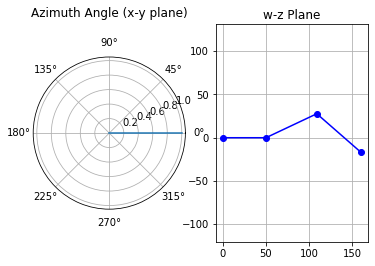

In [164]:
plotLeg(160,0,-17, leg)

Angles: -45.00 25.38 -111.66
w-z plane (w,z): 113.14 -40.00


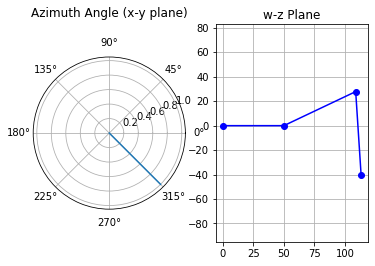

In [165]:
plotLeg(80,-80,-40, leg)

Angles: 0.00 -1.92 -92.26
w-z plane (w,z): 110.00 -70.00


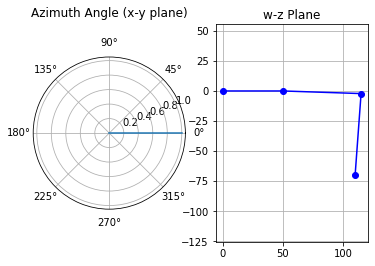

In [166]:
plotLeg(110,0,-70, leg)

Angles: 0.00 82.62 -154.05
w-z plane (w,z): 80.00 0.00


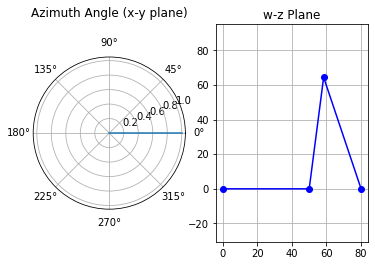

In [167]:
plotLeg(80,0,0, leg)